### Workshop 3
Analyzing Delta variant's effect globally. Delta variant was initially detected in India late 2020.

In [1]:
import os, re, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from IPython.display import IFrame
from IPython.display import Image
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Creating two different dataframes from two CSV files. Renaming the column name in two dataframes to make it consistent.

In [2]:
root = 'Covid'
recent_date = "05-31-2021"
previous_date = "12-30-2020"
duplicate_columns = {"Lat": "Latitude", 
                    "Long_": "Longitude",
                    "Incidence_Rate": "Incident_Rate",
                    "Case-Fatality_Ratio": "Case_Fatality_Ratio",
                    "Province/State": "Province_State",
                    "Country/Region": "Country_Region",
                    "Last Update": "Last_Update"}
recent_df = pd.read_csv(os.path.join(root, (recent_date + ".csv")))
previous_df = pd.read_csv(os.path.join(root, (previous_date + ".csv")))

for key, value in duplicate_columns.items(): 
    if key in recent_df.columns:
        recent_df = recent_df.rename(columns={key: value}) 
    if key in previous_df.columns:
        previous_df = previous_df.rename(columns={key: value})

#### Printing out two different dataframe's first 5 rows.

In [3]:
recent_df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-06-01 04:23:09,33.93911,67.709953,71838,2944,57629.0,11265.0,Afghanistan,184.539074,4.098110
1,NaN,NaN,NaN,Albania,2021-06-01 04:23:09,41.15330,20.168300,132315,2451,129431.0,433.0,Albania,4597.783029,1.852398
2,NaN,NaN,NaN,Algeria,2021-06-01 04:23:09,28.03390,1.659600,128913,3472,89839.0,35602.0,Algeria,293.979325,2.693289
3,NaN,NaN,NaN,Andorra,2021-06-01 04:23:09,42.50630,1.521800,13727,127,13458.0,142.0,Andorra,17766.129554,0.925184
4,NaN,NaN,NaN,Angola,2021-06-01 04:23:09,-11.20270,17.873900,34551,766,28079.0,5706.0,Angola,105.126022,2.217013


In [4]:
previous_df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-12-31 05:22:49,33.93911,67.709953,52330,2189,41612,8529,Afghanistan,134.426484,4.183069
1,NaN,NaN,NaN,Albania,2020-12-31 05:22:49,41.15330,20.168300,57727,1174,33185,23368,Albania,2005.942039,2.033710
2,NaN,NaN,NaN,Algeria,2020-12-31 05:22:49,28.03390,1.659600,99311,2751,66855,29705,Algeria,226.473519,2.770086
3,NaN,NaN,NaN,Andorra,2020-12-31 05:22:49,42.50630,1.521800,7983,84,7384,515,Andorra,10331.974374,1.052236
4,NaN,NaN,NaN,Angola,2020-12-31 05:22:49,-11.20270,17.873900,17433,405,10859,6169,Angola,53.042226,2.323180


In [5]:
current_df = pd.DataFrame(columns=['Province_State','Country_Region',
                                   'Confirmed','Deaths'])
current_df['Province_State'] = recent_df['Province_State']
current_df['Country_Region'] = recent_df['Country_Region']
current_df['Confirmed'] = recent_df['Confirmed'] - previous_df['Confirmed'] 
current_df['Deaths'] = recent_df['Deaths'] - previous_df['Deaths'] 

#### Displaying the shape of the dataframe we just created.

In [6]:
current_df.shape

(4008, 4)

#### Printing first 5 columns of a dataframe

current_df.head()

#### Saving the dataframe's content to the CSV file named 'SubasThapa-2128468.csv'.

In [7]:
name_number = 'SubasThapa-2128468.csv'
current_df.to_csv(name_number, index=False)

#### Creating a dataframe named 'data' from the file we just created in above step.

In [8]:
data = pd.read_csv(name_number)

#### Printing the first 5 rows from a dataframe we just created.

In [9]:
data.head()

,Province_State,Country_Region,Confirmed,Deaths
0,NaN,Afghanistan,19508.0,755.0
1,NaN,Albania,74588.0,1277.0
2,NaN,Algeria,29602.0,721.0
3,NaN,Andorra,5744.0,43.0
4,NaN,Angola,17118.0,361.0


#### Printing the shape of a recently created dataframe.

In [10]:
print(data.shape)

(4008, 4)


In [11]:
print(data.count())

Province_State    3832
Country_Region    4008
Confirmed         4005
Deaths            4005
dtype: int64


#### Q1. Print how many null values exist in the dataset.

In [12]:
data.apply(lambda x: sum(x.isnull()), axis = 0)

Province_State    176
Country_Region      0
Confirmed           3
Deaths              3
dtype: int64

#### Checking if there are any null values in Province_State column and replacing null values with the values present in the Country_Region column.

In [13]:
data.loc[data['Province_State'].isnull(),'Province_State'] = 
    data['Country_Region']

In [14]:
data.head()

,Province_State,Country_Region,Confirmed,Deaths
0,Afghanistan,Afghanistan,19508.0,755.0
1,Albania,Albania,74588.0,1277.0
2,Algeria,Algeria,29602.0,721.0
3,Andorra,Andorra,5744.0,43.0
4,Angola,Angola,17118.0,361.0


#### Creating a list named 'states' from the unique values present in 'Province_State' and counts the number of unique value present in the list.

In [15]:
states = data['Province_State'].unique()
print("Number of unique States - ", len(states))

Number of unique States -  768


#### Q2. Print how many unique countries exist in the dataset using a similar approach.

The nunique() function counts the number of unique values while unique() function lists all the unique value present in the column.

In [16]:
print(data['Country_Region'].nunique())

198


In [17]:
print(data["Country_Region"].unique())

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jo

In [18]:
import datetime, time, requests
from time import sleep
from geopy.geocoders import Nominatim
def get_lat_lon(place):
    geolocator = Nominatim(user_agent=name_number)
    location = geolocator.geocode(place)
    lat_lon = location.latitude, location.longitude
 
    output = [float(i) for i in lat_lon]
    return output

In [19]:
data['Province_State'].value_counts()

Texas             255
Georgia           162
Virginia          134
Kentucky          121
Missouri          117
                 ... 
Madhya Pradesh      1
Maharashtra         1
Manipur             1
Meghalaya           1
Guernsey            1
Name: Province_State, Length: 768, dtype: int64

In [20]:
from tqdm import tqdm
geo_lat = []
geo_lon = []
not_found = []
found = []
for state in tqdm(states):
    time.sleep(0.2)
    lat_lon = [None, None]
    try:
        lat_lon = get_lat_lon(state)
        found.append(state)
    except: 
        not_found.append(state)
 
    geo_lat.append(lat_lon[0])
    geo_lon.append(lat_lon[1])
        
if len(not_found) > 0:
    print("Locations are not found for - ", not_found)
else:
    print("Found all the locations")

100%|████████████████████████████████████████████████████████████████████████████████| 768/768 [08:47<00:00,  1.45it/s]

Locations are not found for -  ['Repatriated Travellers', 'Bonaire, Sint Eustatius and Saba', 'Sakha (Yakutiya) Republic', 'Summer Olympics 2020', 'W.P. Labuan']


In [21]:
states_list = states.tolist() #converting states to list to index list's items 
lats = []
lons = []
for i, r in data.iterrows():
    state = r['Province_State']
    index_list = states_list.index(state)
    lats.append(geo_lat[index_list])
    lons.append(geo_lon[index_list])
 
 
data['Latitude'] = lats
data['Longitude'] = lons

In [22]:
data.head()

,Province_State,Country_Region,Confirmed,Deaths,Latitude,Longitude
0,Afghanistan,Afghanistan,19508.0,755.0,33.768006,66.238514
1,Albania,Albania,74588.0,1277.0,41.000028,19.999962
2,Algeria,Algeria,29602.0,721.0,28.000027,2.999983
3,Andorra,Andorra,5744.0,43.0,42.540717,1.573203
4,Angola,Angola,17118.0,361.0,-11.877577,17.569124


#### Q3. Check whether the latitude and longitude values we retrieved from geopy are same as the latitude and longitude given in the dataset. Identify and report differences in values.


In [23]:
print(recent_df.head())

   FIPS Admin2 Province_State Country_Region          Last_Update  Latitude  \
0   NaN    NaN            NaN    Afghanistan  2021-06-01 04:23:09  33.93911   
1   NaN    NaN            NaN        Albania  2021-06-01 04:23:09  41.15330   
2   NaN    NaN            NaN        Algeria  2021-06-01 04:23:09  28.03390   
3   NaN    NaN            NaN        Andorra  2021-06-01 04:23:09  42.50630   
4   NaN    NaN            NaN         Angola  2021-06-01 04:23:09 -11.20270   

   Longitude  Confirmed  Deaths  Recovered   Active Combined_Key  \
0  67.709953      71838    2944    57629.0  11265.0  Afghanistan   
1  20.168300     132315    2451   129431.0    433.0      Albania   
2   1.659600     128913    3472    89839.0  35602.0      Algeria   
3   1.521800      13727     127    13458.0    142.0      Andorra   
4  17.873900      34551     766    28079.0   5706.0       Angola   

   Incident_Rate  Case_Fatality_Ratio  
0     184.539074             4.098110  
1    4597.783029             1.85239

In [24]:
print(data.head())

  Province_State Country_Region  Confirmed  Deaths   Latitude  Longitude
0    Afghanistan    Afghanistan    19508.0   755.0  33.768006  66.238514
1        Albania        Albania    74588.0  1277.0  41.000028  19.999962
2        Algeria        Algeria    29602.0   721.0  28.000027   2.999983
3        Andorra        Andorra     5744.0    43.0  42.540717   1.573203
4         Angola         Angola    17118.0   361.0 -11.877577  17.569124


It can be seen that the latitude and longitude values given in the dataset and retrieved values are different.

In [25]:
recent_df['Latitude'].head()

0    33.93911
1    41.15330
2    28.03390
3    42.50630
4   -11.20270
Name: Latitude, dtype: float64

#### Checking if there are still null values present in all columns.

In [26]:
data.apply(lambda x: sum(x.isnull()), axis = 0)

Province_State    0
Country_Region    0
Confirmed         3
Deaths            3
Latitude          5
Longitude         5
dtype: int64

#### Drop all rows that contains null value and update the dataframe.

In [27]:
data.dropna(inplace=True)

#### Making sure that all null values are dropped. If we get zero for all columns, it indicates that there are no null values present in the dataset.

In [28]:
data.apply(lambda x: sum(x.isnull()), axis = 0)

Province_State    0
Country_Region    0
Confirmed         0
Deaths            0
Latitude          0
Longitude         0
dtype: int64

#### Let's print the shape of the dataframe and see number of rows and columns. 

In [29]:
data.shape

(4000, 6)

#### Selecting only two columns(Confirmed and Deaths) and creating a new dataframe named clustering_data.

In [30]:
clustering_data = data[["Confirmed", "Deaths"]]

In [31]:
clustering_data.head()

,Confirmed,Deaths
0,19508.0,755.0
1,74588.0,1277.0
2,29602.0,721.0
3,5744.0,43.0
4,17118.0,361.0


In the below step, we used scaling technique where column are rescaled so that they demonstrate the properties of a standard Gaussian distribution, i.e. mean = 0 and variance = 1.

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit(clustering_data).transform
(clustering_data.astype(np.float))
print(X_scaled)

[[-0.01107649  0.06114993]
 [ 0.22695109  0.16581263]
 [ 0.03254461  0.05433282]
 ...
 [-0.09538009 -0.09023002]
 [-0.10705243 -0.09845066]
 [-0.09666357 -0.09343808]]


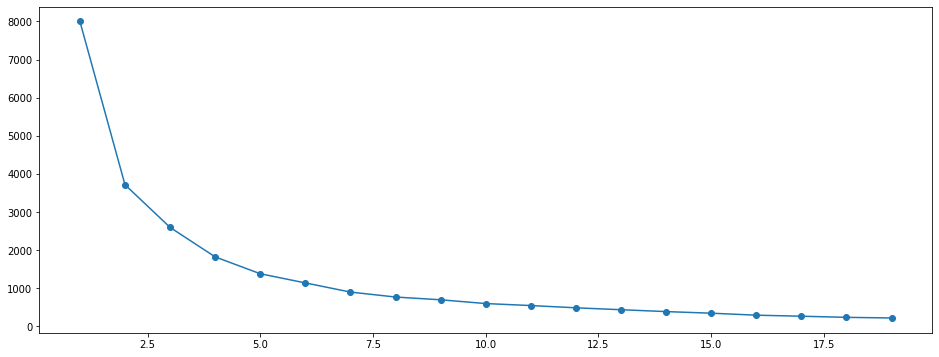

In [33]:
cluster_range = range( 1, 20 )
cluster_errors = []
for num_clusters in cluster_range:
 clusters = KMeans( num_clusters )
 clusters.fit( X_scaled )
 cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, 
 "cluster_errors": cluster_errors } )
plt.figure(figsize=(16,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, 
         marker = "o" );

To determine the optimal number of clusters, we have to select the value of k at the “elbow” i.e. the point after which the inertia start decreasing in a linear fashion. Thus for the above cluster, we conclude that the optimal number of clusters is 4. Our value for K will be 4.

In [34]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', 
                random_state = 10)
y_kmeans = kmeans.fit_predict(X_scaled)
#beginning of the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans+1
# New list called cluster
cluster = list(y_kmeans1)
# Adding cluster to our data set
clustering_data['cluster'] = cluster

In [35]:
clustering_data.head(10)

,Confirmed,Deaths,cluster
0,19508.0,755.0,1
1,74588.0,1277.0,1
2,29602.0,721.0,1
3,5744.0,43.0,1
4,17118.0,361.0,1
5,1102.0,37.0,1
6,2167856.0,34930.0,2
7,63792.0,1631.0,1
8,6.0,0.0,1
9,664.0,0.0,1


In [36]:
kmeans_mean_cluster = 
pd.DataFrame(round(clustering_data.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Confirmed,Deaths
cluster,,
1,10102.2,206.8
2,1200952.5,28392.2
3,-1458323.1,-42316.7
4,4343727.8,85121.5


In [37]:
data['cluster'] = cluster
clusters = data[['Province_State', 'cluster']]
clusters.loc[clusters['cluster'] == 2]

,Province_State,cluster
6,Argentina,2
53,Minas Gerais,2
56,Parana,2
60,Rio Grande do Sul,2
61,Rio de Janeiro,2
65,Sao Paulo,2
152,Capital District,2
187,Czechia,2
229,Nordrhein-Westfalen,2
247,Hungary,2


In [38]:
data['cluster'] = cluster
clusters = data[['Province_State', 'cluster']]
clusters.loc[clusters['cluster'] == 3]

,Province_State,cluster
214,St Martin,3
267,Lakshadweep,3
285,West Bengal,3
474,Ica,3
487,Tumbes,3
647,Timor-Leste,3
3956,Zhytomyr Oblast,3


#### Q4. Discuss what do you think about other clusters?

The cluster 2 contains area with high death rates and confirmed cases. We can see that Delhi, Karnataka, Kerala are displayed in cluster 2. We will later plot this using Follium.

In [39]:
clusters.loc[clusters['cluster'] == 2]

,Province_State,cluster
6,Argentina,2
53,Minas Gerais,2
56,Parana,2
60,Rio Grande do Sul,2
61,Rio de Janeiro,2
65,Sao Paulo,2
152,Capital District,2
187,Czechia,2
229,Nordrhein-Westfalen,2
247,Hungary,2


Cluster 1 contains states that have low death rate and confirmed cases.

In [40]:
clusters.loc[clusters['cluster'] == 1]

,Province_State,cluster
0,Afghanistan,1
1,Albania,1
2,Algeria,1
3,Andorra,1
4,Angola,1
...,...,...
3999,W.P. Kuala Lumpur,1
4001,W.P. Putrajaya,1
4002,Unknown,1
4003,Tonga,1


In [41]:
clusters.loc[clusters['cluster'] == 3]

,Province_State,cluster
214,St Martin,3
267,Lakshadweep,3
285,West Bengal,3
474,Ica,3
487,Tumbes,3
647,Timor-Leste,3
3956,Zhytomyr Oblast,3


In [42]:
data.head(20)

,Province_State,Country_Region,Confirmed,Deaths,Latitude,Longitude,cluster
0,Afghanistan,Afghanistan,19508.0,755.0,33.768006,66.238514,1
1,Albania,Albania,74588.0,1277.0,41.000028,19.999962,1
2,Algeria,Algeria,29602.0,721.0,28.000027,2.999983,1
3,Andorra,Andorra,5744.0,43.0,42.540717,1.573203,1
4,Angola,Angola,17118.0,361.0,-11.877577,17.569124,1
5,Antigua and Barbuda,Antigua and Barbuda,1102.0,37.0,17.223472,-61.955461,1
6,Argentina,Argentina,2167856.0,34930.0,-34.996496,-64.967282,2
7,Armenia,Armenia,63792.0,1631.0,40.769627,44.673665,1
8,Australian Capital Territory,Australia,6.0,0.0,-35.488350,149.002694,1
9,New South Wales,Australia,664.0,0.0,-31.875984,147.286949,1


In [43]:
def get_color(cluster_id):
    if cluster_id == 2:
        return 'darkred'
    if cluster_id == 1:
        return 'green' 
    if cluster_id == 3:
        return 'orange'
    if cluster_id == 4:
        return 'yellow'
 
data["color"] = data["cluster"].apply(lambda x: get_color(x))

In [44]:
data.head()

,Province_State,Country_Region,Confirmed,Deaths,Latitude,Longitude,cluster,color
0,Afghanistan,Afghanistan,19508.0,755.0,33.768006,66.238514,1,green
1,Albania,Albania,74588.0,1277.0,41.000028,19.999962,1,green
2,Algeria,Algeria,29602.0,721.0,28.000027,2.999983,1,green
3,Andorra,Andorra,5744.0,43.0,42.540717,1.573203,1,green
4,Angola,Angola,17118.0,361.0,-11.877577,17.569124,1,green


In [45]:
this_map = folium.Map(location =[data["Latitude"].mean(), 
 data["Longitude"].mean()], zoom_start=5)
def plot_dot(point): 
 '''input: series that contains a numeric named latitude and a numeric named longitude
 this function creates a CircleMarker and adds it to your this_map'''
 folium.CircleMarker(location=[point.Latitude, point.Longitude],
 radius=2, 
color=point.color,
 weight=1).add_to(this_map)
 
 
#clustered_full.apply(,axis=1) #use this to iterate through every row in your dataframe
data.apply(plot_dot, axis = 1)
#Set the zoom to the maximum possible
this_map.fit_bounds(this_map.get_bounds())
#Save the map to an HTML file
this_map.save(os.path.join('covid_map_Delta_Variant.html'))

# Report

#### Q5.Provide a brief description of the analysis and pre-processing performed and reason why these processes are required (e.g., it’s impact on the results)? Write a summary describing your understanding of the clustering results (based on the maps). Discuss whether you agree or disagree with the results achieved? Provide a evidence to support the findings. E.g., a newswebsite supporting or contrasting the clustering result.

**Agenda:** 
In this workshop, I am trying to compare two different variant's effect globally. I am analysing Omicron and Delta variants' impact on global health. Delta variant was originally detected in India in late 2020 while Omicorn variant was detected in South Africa in November 2021. According to WHO, Delta variant is the strongest variant compared to Omicron.


#### 1. Some of the libraries used

**i. Geocoders**
 - geopy is a Python library for several popular geocoding web services. It helps us to locate the coordinates(Latitude and Longitude) of addresses, cities, countries, and landmarks across the world.
 - geopy.geocoder() is used to resolve a location from a string. It returns a set of coordinate(Latitude and Longitude) values for each location. We pass Province_State values from each row and returns a coordinate values.
 
**ii.  Progress bar using tqdm**
This library is used to create and show a smart progress meter. We need to pass iterable to tqdm. Unique Province_State values are stored in a list named states and we are using it as an iterable. Progress bar will be indicated according to the state values. The below figure is the progress bar we created using library tqdm.
<img src='progress-bar.jpg' width=800>

**iii. Follium**
Folium is a data visualization library and helps to visualize geospatial data. With Folium, one can create a map of any location in the world. Based on the clusters color marker are added to the map. Colors green, darkred, orange and yellow colours are assigned to cluster 1, cluster 2, cluster 3 and cluster 4 respectively. 


#### 2. Pre-processing (Data Scaling using StandardScaler)
**Standardisation:**
It is a scaling technique where column are rescaled so that they demonstrate the properties of a standard Gaussian distribution, i.e. mean = 0 and variance = 1. In this project we have used Scikit-learn function StandardScaler to perform standardisation. Data Scaling is a data preprocessing step for numerical features. This machine learning algorithm named K-Means algorithm requires data scaling to produce good results.

<code>scaler = StandardScaler()
X_scaled = scaler.fit(clustering_data).transform(clustering_data.astype(np.float)) </code>
- The fit method used above is used to compute the mean and std dev for a given feature. It can be used further for scaling.
- The transform method is used to perform scaling using mean and std dev calculated using the .fit() method.
<code>scaler.fit(clustering_data).transform(clustering_data.astype(np.float))</code>

The code above calculates the mean and std dev for a given feature(clustering_data), and performs scaling.

**Reason to perform scaling:**

i. Real-world datasets often contain features that are varying in degrees of magnitude, range and units. Therefore, in order for machine learning models to interpret these features on the same scale, we need to perform feature scaling.

ii. Standardization of a dataset is a common requirement for many machine learning estimators. They might behave badly and provide incorrect result if the individual features are not normally distributed data.

iii. If one feature has a variance(orders of magnitude) larger that others, feature with larger value might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

#### 3. Using Scree plot to identify number of clusters
**Inertia:** This vallue is the sum of squared distances of samples to their closest cluster center.
<img src='screeplot.jpg' width=500>

To determine the optimal number of clusters, we have to select the value of k at the “elbow” i.e. the point after which the inertia start decreasing in a linear fashion. Thus for the above cluster, we conclude that the optimal number of clusters is 4. It indicates that our data will be grouped into 4 clusters.

#### 4. K-means Clustering
<code>kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 10)</code>

- n_clusters : Specifies 4 clusters to form as well as 4 centroids to generate.
- k-means++ : Specifies to select the initial cluster centers for k-mean clustering to speed up convergence.
- random_state : Determines random number generation for centroid initialization.

<code>y_kmeans = kmeans.fit_predict(X_scaled)</code>

The above function **fit_predict** computes cluster centers and predict cluster index for each sample. It also returns index of the cluster each sample belongs to.




#### My views on the result

From the below news it shows that Delta variant of Coronavirus in US, India, Brazil, France, Russia, Turkey, UK etc have spread widely. We can also see that the India's State Maharastra has the highest number of confirmed and death cases due to delta variant. Delta variant Delta was initially detected in India late 2020, and had spread to 179 countries by 22 November 2021. First part of the workshop will see how the delta variant affected globally and in the second part we will discuss Omicron variant's effect. The below news in BBC shows the Delta variant effect globally and in India's states.

![CovidMayMap](covid-may.png)

<img src='covid-data-graph.png' width=800>


The below diagran shows Delta variant's effect.

<img src='delta-effect.jpg' width=700>

It can be seen that India, Brazil, France, Spain, Italy and Germany with redmark. It shows that the number of confirmed and death cases were high in those countries during that time. The reason why USA is green because USA had consistent death and confirmed cases through out that period while India, and other countries had rapid rise.


The below diagran shows Omicron variant's effect.

<img src='omicron-effect.jpg' width=700>

It can be seen from the above map that we have more green markers compared to yellow and red. It can be concluded that Delta variant had more severe impact globally compared to Omicron variant. Vietnam, Turkey and Germany still at high risk area. UK also has yellow mark due to high transmissibility rate.